In [149]:
#LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
import sklearn.metrics as metrics
from sklearn.metrics import r2_score,roc_auc_score,classification_report,mean_squared_error,accuracy_score,confusion_matrix,precision_score,recall_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')
import sklearn.ensemble as ensemble
import sklearn.metrics as metrics
from lightgbm import LGBMClassifier
import xgboost
from catboost import CatBoostClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.cluster import KMeans

In [150]:
%%time
master=pd.read_csv('D:/R/Credit Default/mast.csv')
print(master.shape)
master.head()

(754569, 13)
Wall time: 937 ms


,accountnumber,Bank_Name,contactable,TOS,Name_1,Age,City,State,Authenticated,BusinessProduct,Paid,Start_Date,Credit_Limit
0,10XXXX05,Bank1,1,905.0,Name 1,55.0,MUMBAI,Maharashtra,N,Personal Loan,0,2005-04-19,100000.0
1,10XXXX12,Bank1,0,948.0,Name 1,57.0,MUMBAI,Maharashtra,N,Personal Loan,0,2005-04-20,75000.0
2,10XXXX08,Bank1,1,1189.0,Name 1,49.0,MUMBAI,Maharashtra,N,Personal Loan,0,2005-04-28,150000.0
3,10XXXX48,Bank1,1,1050.0,Name 1,41.0,MUMBAI,Maharashtra,Y,Personal Loan,0,2005-06-01,225000.0
4,10XXXX16,Bank1,1,21.0,Name 1,54.0,MUMBAI,Maharashtra,N,Personal Loan,0,2005-06-03,120000.0


In [151]:
#CHECK DTYPES#
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754569 entries, 0 to 754568
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   accountnumber    754569 non-null  object 
 1   Bank_Name        754569 non-null  object 
 2   contactable      754569 non-null  int64  
 3   TOS              749826 non-null  float64
 4   Name_1           754569 non-null  object 
 5   Age              754548 non-null  float64
 6   City             717596 non-null  object 
 7   State            677935 non-null  object 
 8   Authenticated    754569 non-null  object 
 9   BusinessProduct  754569 non-null  object 
 10  Paid             754569 non-null  int64  
 11  Start_Date       740833 non-null  object 
 12  Credit_Limit     751576 non-null  float64
dtypes: float64(3), int64(2), object(8)
memory usage: 74.8+ MB


In [152]:
#CONVERT LOWER TO UPPERCASE
master=master.apply(lambda s:s.astype(str).str.upper())
master.head()

,accountnumber,Bank_Name,contactable,TOS,Name_1,Age,City,State,Authenticated,BusinessProduct,Paid,Start_Date,Credit_Limit
0,10XXXX05,BANK1,1,905.0,NAME 1,55.0,MUMBAI,MAHARASHTRA,N,PERSONAL LOAN,0,2005-04-19,100000.0
1,10XXXX12,BANK1,0,948.0,NAME 1,57.0,MUMBAI,MAHARASHTRA,N,PERSONAL LOAN,0,2005-04-20,75000.0
2,10XXXX08,BANK1,1,1189.0,NAME 1,49.0,MUMBAI,MAHARASHTRA,N,PERSONAL LOAN,0,2005-04-28,150000.0
3,10XXXX48,BANK1,1,1050.0,NAME 1,41.0,MUMBAI,MAHARASHTRA,Y,PERSONAL LOAN,0,2005-06-01,225000.0
4,10XXXX16,BANK1,1,21.0,NAME 1,54.0,MUMBAI,MAHARASHTRA,N,PERSONAL LOAN,0,2005-06-03,120000.0


In [153]:
#CHECK NULL VALUES#
master.isnull().sum()/len(master)*100


accountnumber      0.0
Bank_Name          0.0
contactable        0.0
TOS                0.0
Name_1             0.0
Age                0.0
City               0.0
State              0.0
Authenticated      0.0
BusinessProduct    0.0
Paid               0.0
Start_Date         0.0
Credit_Limit       0.0
dtype: float64

In [154]:
# DROP COLUMNS
#QUANTILE 1 TO 100#
def out(x):
    d=np.arange(0,1,0.01)
    ds=x.quantile(d)
    return ds



master=master.drop(['Bank_Name','Name_1'],axis=1)
master=master.replace('NAN',np.nan)
master=master.dropna()
g={'N':0,'Y':1}
master.Authenticated=master.Authenticated.map(g)
master.Authenticated=master.Authenticated.astype(int)

In [155]:
# CHANGE TEXT MISMATCH
master=master.drop(master[master.State.isin(['18','INDIA'])].index)
master.State.replace({'DAMAN  DIU':'DAMAN & DIU','ANDAMAN  NICOBAR ISLANDS':'ANDAMAN NICOBAR',
    'CHHATTISGARH':'CHATTISGARH','JAMMU  KASHMIR':'JAMMU & KASHMIR','DADRA  NAGAR HAVELI':'DADRA & NAGAR HAVELI'},inplace=True)
X=master[['TOS','Age','contactable','Paid','Credit_Limit','Authenticated']]
X=pd.DataFrame(X)

In [156]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X=sc.fit_transform(X)

In [157]:
gg=['TOS','Age','contactable','Paid','Credit_Limit','Authenticated']
X=pd.DataFrame(X,columns=gg)
X.head()

,TOS,Age,contactable,Paid,Credit_Limit,Authenticated
0,-0.658352,0.786791,0.339976,-0.154234,0.047343,-0.375420
1,-0.649140,0.907629,-2.941380,-0.154234,-0.080190,-0.375420
2,-0.597511,0.424277,0.339976,-0.154234,0.302409,-0.375420
3,-0.627289,-0.059074,0.339976,-0.154234,0.685009,2.663683
4,-0.847731,0.726372,0.339976,-0.154234,0.149370,-0.375420


In [171]:
X.TOS.loc[X.TOS > 2.820525]=2.820525
X.Credit_Limit.loc[X.Credit_Limit > 3.618269]=3.618269

In [180]:
dj=out(X.Credit_Limit)
dj.head(5)

0.00   -0.462233
0.01   -0.361579
0.02   -0.351616
0.03   -0.344438
0.04   -0.338780
Name: Credit_Limit, dtype: float64

In [ ]:
ds=X.Credit_Limit.quantil

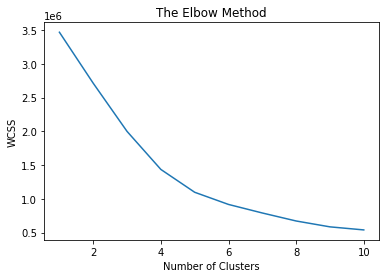

In [175]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [176]:
#Fitting K-MEans to the dataset
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(X)
#Visualize the clusters
X['cluster']=y_kmeans
X.head()


,TOS,Age,contactable,Paid,Credit_Limit,Authenticated,cluster
0,-0.658352,0.786791,0.339976,-0.154234,0.047343,-0.375420,0
1,-0.649140,0.907629,-2.941380,-0.154234,-0.080190,-0.375420,1
2,-0.597511,0.424277,0.339976,-0.154234,0.302409,-0.375420,0
3,-0.627289,-0.059074,0.339976,-0.154234,0.685009,2.663683,2
4,-0.847731,0.726372,0.339976,-0.154234,0.149370,-0.375420,0


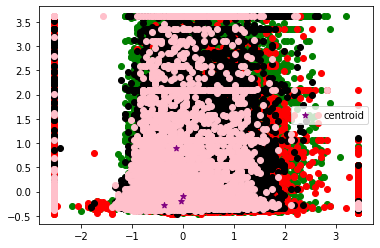

In [179]:
X1 = X[X.cluster==0]
X2 = X[X.cluster==1]
X3 = X[X.cluster==2]
X4 = X[X.cluster==3]
plt.scatter(X1.Age,X1['Credit_Limit'],color='green')
plt.scatter(X2.Age,X2['Credit_Limit'],color='red')
plt.scatter(X3.Age,X3['Credit_Limit'],color='black')
plt.scatter(X4.Age,X4['Credit_Limit'],color='pink')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()